In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train.shape

(42000, 785)

In [9]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
test.shape

(28000, 784)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

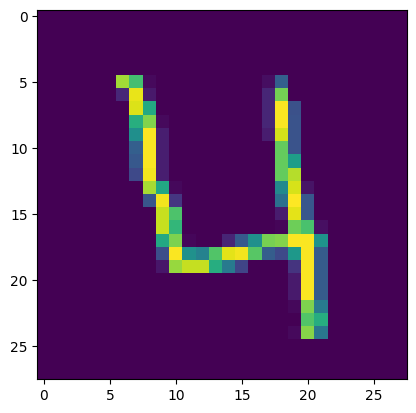

In [18]:
num=np.array(train.iloc[3,1:]).reshape(28,28)
plt.imshow(num)
plt.show()

In [19]:
arr=train.iloc[3,1:]

(array([691.,   7.,  18.,   4.,   5.,   5.,   7.,  12.,   9.,  26.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

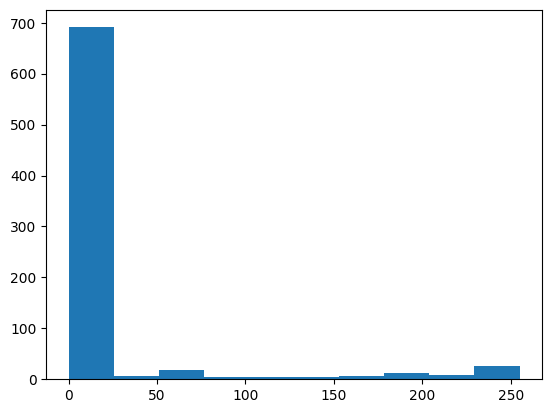

In [20]:
plt.hist(arr)

In [21]:
missing_val_count=train.isna().sum()
missing_val_count

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [23]:
X=np.array(train)
Y=np.array(test)
X_train=X[:,1:]
Y_train=X[:,0]
X_test=Y

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [24]:
X_train=X_train.reshape(-1,28,28,1)

In [26]:
datagen=ImageDataGenerator(
    rotation_range=15,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1        
)
datagen.fit(X_train)

In [27]:
X_train=X_train.reshape(-1,784)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [41]:
int(knn.predict(X_test[1024].reshape(1,-1)))

C:\Users\aswin\AppData\Local\Temp\ipykernel_56952\940743613.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(knn.predict(X_test[1024].reshape(1,-1)))


2

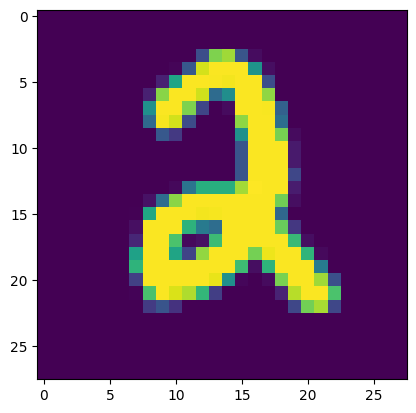

In [42]:
num=np.array(test.iloc[1024,:]).reshape(28,28)
plt.imshow(num)
plt.show()